# Linear Regression on IMDB Movies Dataset using Neural Networks

This notebook contains data cleaning, data visualization, model training and evaluation on IMDB movies dataset.  

# Aim of the project:
The main goal is to create and train a linear regression model based on neural networks to predict the total earnings of movies.

Compare the conventional Linear Regression model with the one trained with neural networks and understand which one performs better.

Compare the model with other conventional models.




DATA LOADING

In [ ]:
import pandas as pd
df=pd.read_csv('/content/IMDb_All_Genres_etf_clean1.csv')

DATA EXPLORATION


In [ ]:
df.shape

(5562, 10)

The dataset contains 5562 rows and 10 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


The dataset has 0 Null Values.

In [ ]:
df.head(5)

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


In [ ]:
df.describe()

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


The Year attribute is irrelevant as the count, mean, standard deviation does not mean anything in actual context. The average Rating of the movies is 6.7 and Runtime is 112.22 minutes.

In [ ]:
df["main_genre"].value_counts()

Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: main_genre, dtype: int64

Most Movies belong to "Action" genre and least to "Musical" genre.

In [ ]:
df["Actors"].value_counts()

William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan       6
Sylvester Stallone, Talia Shire, Burt Young, Carl Weathers          4
Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving    3
Patrick Stewart, Jonathan Frakes, Brent Spiner, LeVar Burton        3
Renée Zellweger, Colin Firth, Hugh Grant, Gemma Jones               2
                                                                   ..
Robert Redford, Casey Affleck, Sissy Spacek, Danny Glover           1
Maggie Smith, Alex Jennings, Jim Broadbent, Clare Hammond           1
Emma Stone, Steve Carell, Andrea Riseborough, Sarah Silverman       1
Warren Beatty, Annette Bening, Harvey Keitel, Ben Kingsley          1
Halil Söyletmez, Doga Konakoglu, Emre Keskin, Ceyda Saltadal        1
Name: Actors, Length: 5511, dtype: int64

William Shatner, Leonard Nimoy, DeForest Kelley, James Doohan have highest movies under their name. They are cast of Star Trek original series.

In [ ]:
df["Director"].value_counts()

Woody Allen                                                          40
Clint Eastwood                                                       32
Steven Spielberg                                                     28
Ron Howard                                                           24
Steven Soderbergh                                                    23
                                                                     ..
Directors:Mike Judge, Mike de Seve, Brian Mulroney, Yvette Kaplan     1
Directors:Aaron Blaise, Robert Walker                                 1
Stephen J. Anderson                                                   1
Directors:Byron Howard, Chris Williams                                1
Gökhan Gök                                                            1
Name: Director, Length: 2320, dtype: int64

Woody Allen has the highest number of movies directed under him.

Movie name will not affect the prediction values so it's better to drop the attribute "Movie_title".

In [ ]:
df = df.drop('Movie_Title', axis = 1)
df.head()

,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


In [ ]:
df["Total_Gross"].value_counts()

Gross Unkown    861
$0.01M           25
$0.02M           22
$0.04M           22
$0.03M           21
               ... 
$1.13M            1
$28.87M           1
$21.08M           1
$44.18M           1
$9.11M            1
Name: Total_Gross, Length: 3501, dtype: int64

The target column contains 861 unknown gross values and the format is "$100M".
Thus it requires cleaning.

In [ ]:
# Remove the symbol"$"
df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')                     #https://www.geeksforgeeks.org/python-pandas-series-str-replace-to-replace-text-in-a-series/

<ipython-input-12-b94947e7339c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')                     #https://www.geeksforgeeks.org/python-pandas-series-str-replace-to-replace-text-in-a-series/


In [ ]:
# Removing the "M"
df['Total_Gross'] = df['Total_Gross'].str.replace('M', '')

# Removing the "Gross Unkonwn"                                                   #https://www.geeksforgeeks.org/python-pandas-series-str-replace-to-replace-text-in-a-series/
df['Total_Gross'] = df['Total_Gross'].str.replace('GrossUnkown', '')

# Setting up "Total_Gross" column as numeric column and making sure that non-numeric values are set to NaN
df['Total_Gross'] = pd.to_numeric(df['Total_Gross'], errors='coerce')            #https://www.geeksforgeeks.org/python-pandas-to_numeric-method/

# Dropping the Rows with NaN values
df.dropna(subset=['Total_Gross'], inplace=True)
print(df)

      Year                                  Director  \
1     2008                         Christopher Nolan   
2     2003                             Peter Jackson   
3     2010                         Christopher Nolan   
4     2002                             Peter Jackson   
5     2001                             Peter Jackson   
...    ...                                       ...   
5555  2005                         Lawrence Guterman   
5557  2008  Directors:Jason Friedberg, Aaron Seltzer   
5558  2008                                Tom Putnam   
5559  2003                             Robert Iscove   
5560  2004                                 Bob Clark   

                                                 Actors  Rating  \
1     Christian Bale, Heath Ledger, Aaron Eckhart, M...     9.0   
2     Elijah Wood, Viggo Mortensen, Ian McKellen, Or...     9.0   
3     Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...     8.8   
4     Elijah Wood, Ian McKellen, Viggo Mortensen, Or...    

DATA VISUALIZATION

Text(0.5, 1.0, 'Number of Movies per Genre')

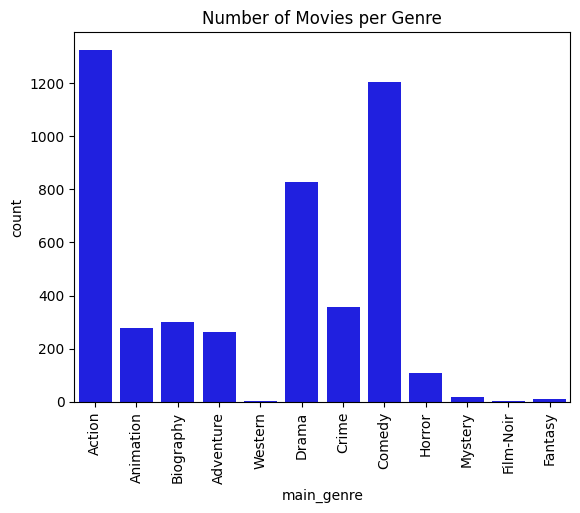

In [ ]:
# Plotting the Count of Movies against Main_Genre
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = 'main_genre', data = df, color='blue')
plt.xticks(rotation = 90)
plt.title('Number of Movies per Genre')

Text(0.5, 1.0, 'Number of Movies and Censorship')

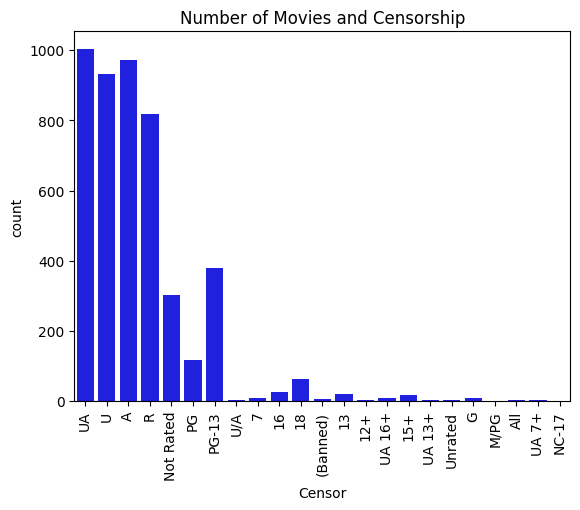

In [ ]:
# Plotting the Count of Movies against Censor
sns.countplot(x = 'Censor', data = df, color ='blue')
plt.xticks(rotation = 90)
plt.title('Number of Movies and Censorship')

<ipython-input-16-c06b6c1a251b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


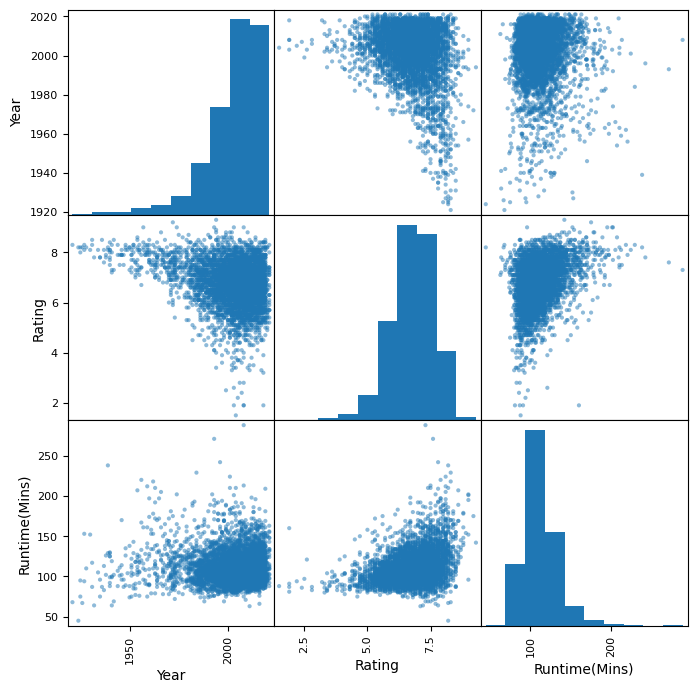

In [ ]:
#Plotting correlation graphs
from pandas.plotting import scatter_matrix
corr_matrix = df.corr()
corr_matrix["Total_Gross"].sort_values(ascending=False)

attributes = ["Year", "Rating","Runtime(Mins)"]
scatter_matrix(df[attributes], figsize=(8, 8))
plt.show()

The above does not have any apparent contributions in the total income of the movies.

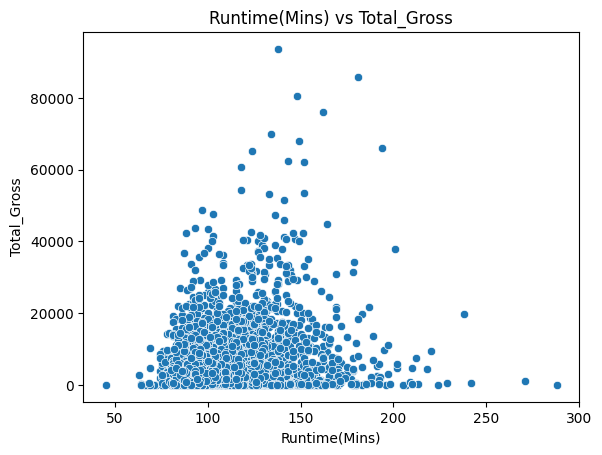

In [ ]:
# Plotting the Runtime(Mins) against Total_Gross
sns.scatterplot(x='Runtime(Mins)', y='Total_Gross', data=df)
plt.title('Runtime(Mins) vs Total_Gross')
plt.show()

This plot gives highest Runtime as 280 minutes and least as 45 minutes.

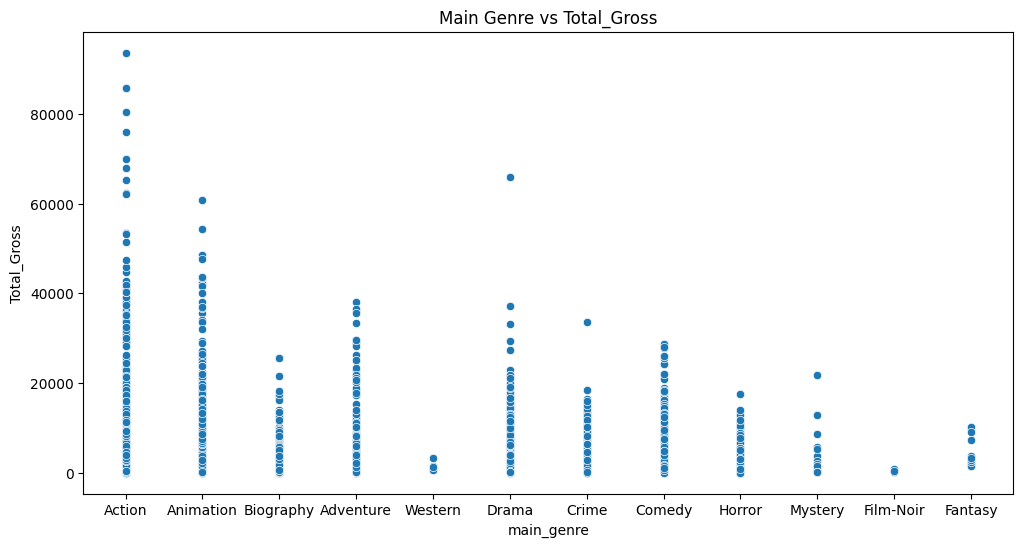

In [ ]:
# Plotting the main genre against Total_Gross
plt.figure(figsize=(12, 6))
sns.scatterplot(x='main_genre', y='Total_Gross', data=df,)
plt.title('Main Genre vs Total_Gross')
plt.show()

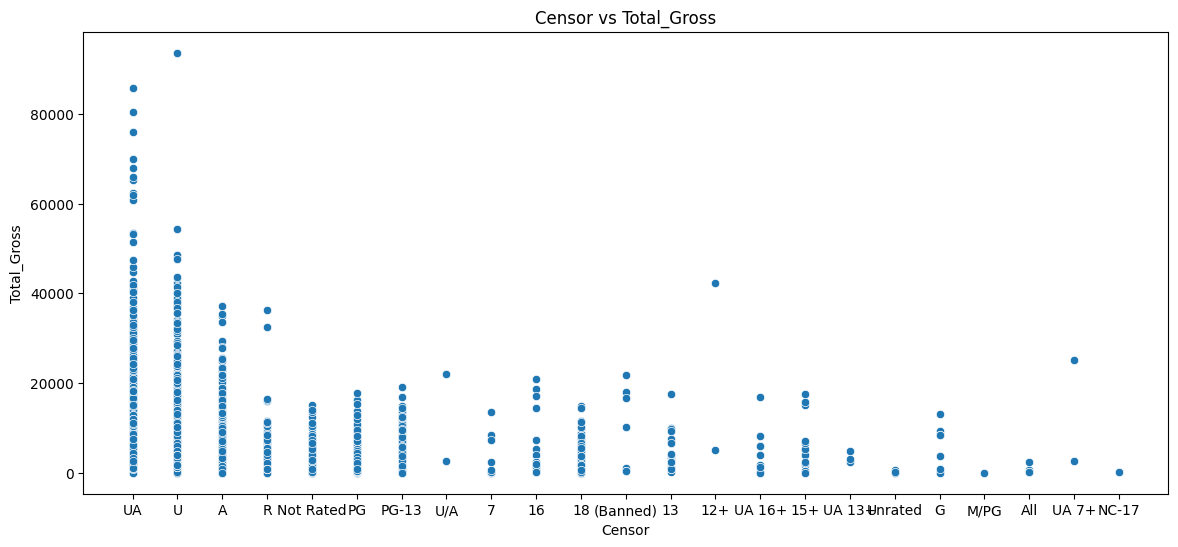

In [ ]:
# Plotting the Censor against Total_Gross
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Censor', y='Total_Gross', data=df,)
plt.title('Censor vs Total_Gross')
plt.show()

MODEL TRAINING

In [ ]:
df=df.iloc[:,:].values
print(df)

[[2008 'Christopher Nolan'
  'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine' ...
  53486.0 'Action' ' Crime,  Drama']
 [2003 'Peter Jackson'
  'Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom' ... 37785.0
  'Action' ' Adventure,  Drama']
 [2010 'Christopher Nolan'
  'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe'
  ... 29258.0 'Action' ' Adventure,  Sci-Fi']
 ...
 [2008 'Tom Putnam'
  'Paris Hilton, Joel David Moore, Christine Lakin, Johann Urb' ... 3.0
  'Comedy' ' Romance']
 [2003 'Robert Iscove'
  'Kelly Clarkson, Justin Guarini, Katherine Bailess, Anika Noni Rose'
  ... 492.0 'Comedy' ' Musical,  Romance']
 [2004 'Bob Clark' 'Jon Voight, Scott Baio, Vanessa Angel, Skyler Shaye'
  ... 911.0 'Comedy' ' Family,  Sci-Fi']]


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encoding step
label_encoder = LabelEncoder()
df=pd.read_csv('/content/IMDb_All_Genres_etf_clean1.csv')
df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')
df['Total_Gross'] = df['Total_Gross'].str.replace('M', '')
df['Total_Gross'] = df['Total_Gross'].str.replace('GrossUnkown', '')
df['Total_Gross'] = pd.to_numeric(df['Total_Gross'], errors='coerce')
df.dropna(subset=['Total_Gross'], inplace=True)


df['encode_genre'] = label_encoder.fit_transform(df['main_genre'])
df['encode_director'] = label_encoder.fit_transform(df['Director'])
df['encode_actor'] = label_encoder.fit_transform(df['Actors'])

# Concatenate all features
X = pd.concat([df['encode_genre'], df['encode_director'], df['encode_actor']], axis=1)
print(X)

      encode_genre  encode_director  encode_actor
1                0              264           808
2                0             1471          1283
3                0              264          2705
4                0             1471          1278
5                0             1471          1277
...            ...              ...           ...
5555             4             1165          1888
5557             4              498           642
5558             4             1835          3356
5559             4             1572          2526
5560             4              162          2321

[4701 rows x 3 columns]


<ipython-input-22-e7d08f5efcd7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Total_Gross']  = df['Total_Gross'].str.replace('\W','')


Here, I have used Label Encoding instead of OneHotEncoding beacause it is much more memory efficient, simple and it preseves the order so even after a label repeats it assigns  the same value as earlier.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8833 (34.50 KB)
Trainable params: 8833 (34.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 86199184.0000 - mae: 5256.7725 - val_loss: 80592840.0000 - val_mae: 5250.0142
E

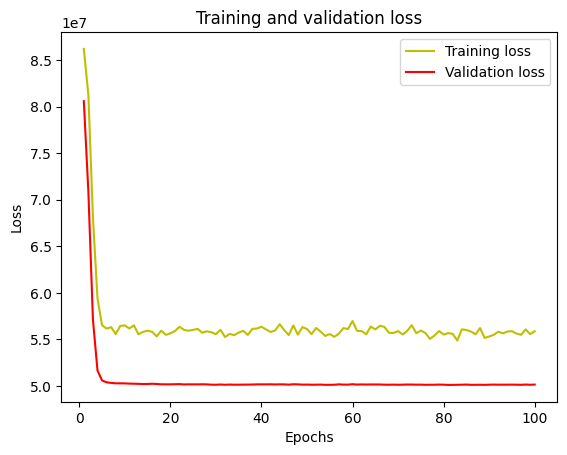

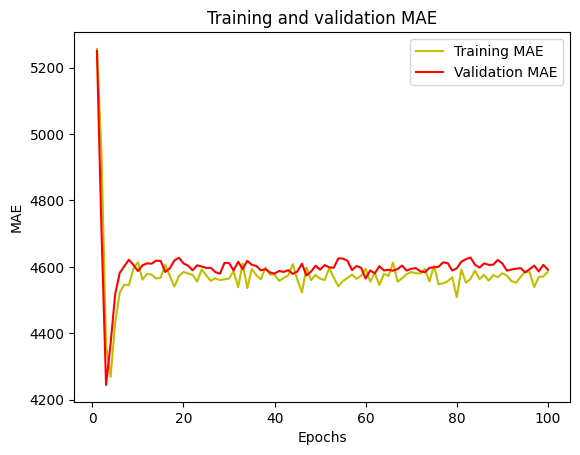

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt

#Target Column
y = df['Total_Gross']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, validation_split=0.2, batch_size = 16, epochs=100)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
#Saving the Model and Loading it
model.save('model.h5')
from keras.models import load_model
load_model = load_model('/content/model.h5')

# Make predictions on the test set
X_test_scaled = scaler.transform(X_test)
predictions = load_model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
mse_NLR = mean_squared_error(y_test, predictions)
mae_NLR = mean_absolute_error(y_test, predictions)

print('MSE: ', mse_NLR)

print('MAE: ', mae_NLR)

RMSE = math.sqrt(mse_NLR)                                    #https://www.askpython.com/python/examples/rmse-root-mean-square-error
print("RMSE:", RMSE)

NRMSE = RMSE/y_test.mean()
print("NRMSE:", NRMSE )


MSE:  45966505.33687174
MAE:  4572.794706273662
RMSE: 6779.860274140739
NRMSE: 1.2273756907213842


In [ ]:
# Calculate the slope and intercept for Regression Line
import numpy as np
slope,intercept = np.polyfit(y_test,predictions,1)          #https://stackoverflow.com/questions/9538525/calculating-slopes-in-numpy-or-scipy
print("SLOPE:",slope)
print("INTERCEPT:",intercept)

SLOPE: [0.07444628]
INTERCEPT: [4753.29769023]


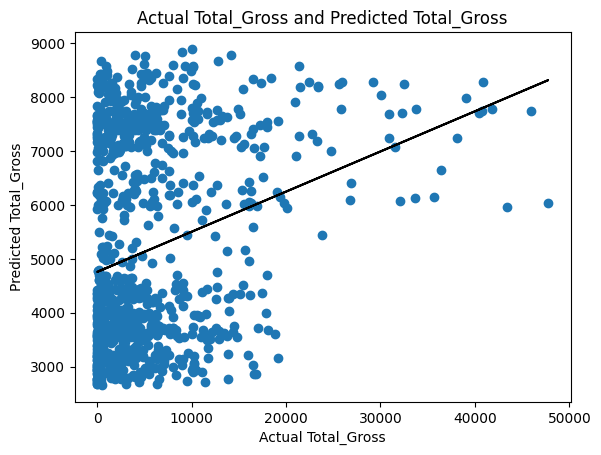

In [ ]:
import matplotlib.pyplot as plt                             #https://www.geeksforgeeks.org/solving-linear-regression-in-python/
reg_line = slope * y_test + intercept
plt.scatter(y_test, predictions)
plt.plot(y_test,reg_line , color='black')
plt.xlabel('Actual Total_Gross')
plt.ylabel('Predicted Total_Gross')
plt.title('Actual Total_Gross and Predicted Total_Gross')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the model
linear_reg_model = LinearRegression()

# Fitting the model on training data
linear_reg_model.fit(X_train, y_train)

# Predicting on test data
y_pred = linear_reg_model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error
import math
mse_LR = mean_squared_error(y_test, y_pred)
mae_LR = mean_absolute_error(y_test, y_pred)
print('MSE: ', mse_LR)
print('MAE: ', mae_LR)

RMSE = math.sqrt(mse_LR)                                    #https://www.askpython.com/python/examples/rmse-root-mean-square-error
print("RMSE:", RMSE)

NRMSE = RMSE/y_test.mean()
print("NRMSE:", NRMSE )

MSE:  48621952.39744792
MAE:  4662.408874006111
RMSE: 6972.944313376374
NRMSE: 1.2993308737530829


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(linear_reg_model, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the mean "MSE" & "RMSE" across all folds
mean_cross_val_mse = -np.mean(cross_val_scores)
mean_cross_val_rmse = np.sqrt(mean_cross_val_mse)
print("Cross-Validation RMSE:", mean_cross_val_rmse)

Cross-Validation RMSE: 7359.712005131821


Let's try some other regression models for comparison

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initializing the model
decision_tree = DecisionTreeRegressor()

# Fitting the model on training data
decision_tree.fit(X_train, y_train)

# Predicting on test data
y_pred_tree = decision_tree.predict(X_test)

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('MSE: ', mse_dt)
print('MAE: ', mae_dt)

RMSE = math.sqrt(mse_dt)
print("RMSE:", RMSE)

from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(decision_tree, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the mean "MSE" & "RMSE" across all folds
mean_cross_val_mse = -np.mean(cross_val_scores)
mean_cross_val_rmse = np.sqrt(mean_cross_val_mse)
print("Cross-Validation RMSE:", mean_cross_val_rmse)

NRMSE = RMSE/y_test.mean()
print("NRMSE:", NRMSE )

MSE:  61278856.09638554
MAE:  4853.227498228207
RMSE: 7828.081252541107
Cross-Validation RMSE: 9578.307945851131
NRMSE: 1.4586761626882012


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the model
model = RandomForestRegressor(n_estimators = 30, random_state=30)

# Fitting the model on training data
model.fit(X_train, y_train)

# Predicting on test data
y_pred_RF = model.predict(X_test)

# Evaluating the model
mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('MSE: ', mse_RF)
print('MAE: ', mae_RF)

RMSE = math.sqrt(mse_RF)
print("RMSE:", RMSE)

from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

# Calculate the mean "MSE" & "RMSE" across all folds
mean_cross_val_mse = -np.mean(cross_val_scores)
mean_cross_val_rmse = np.sqrt(mean_cross_val_mse)
print("Cross-Validation RMSE:", mean_cross_val_rmse)

NRMSE = RMSE/y_test.mean()
print("NRMSE:", NRMSE )

MSE:  43031111.979798995
MAE:  4249.5148846365855
RMSE: 6559.810361572886
Cross-Validation RMSE: 7331.826202468877
NRMSE: 1.222347941658797


Evaluation Scores For the Regression Model built using Neural Networks:

| Metrics             | Scores |
| --------            | ------- |
| Mean Squared Error  | 45966505.336     |
| Root Mean Squared Error | 6780.161     |
| Normalised Root Mean Squared Error | 1.227 |
| Mean Absolute Error | 4572.794 |
      

Evaluation Scores For the Conventional Linear Regression Model:

| Metrics             | Scores |
| --------            | ------- |
| Mean Squared Error  | 48621952.397   |
| Root Mean Squared Error | 6972.944     |
| Normalised Root Mean Squared Error | 1.299 |
| Mean Absolute Error | 4662.408 |

Evaluation Scores For the Decision Tree Regressor Model:

| Metrics             | Scores |
| --------            | ------- |
| Mean Squared Error  | 60125468.465   |
| Root Mean Squared Error | 7754.061     |
| Normalised Root Mean Squared Error | 1.444 |
| Mean Absolute Error | 4778.380 |

Evaluation Scores For the Random Forest Regressor Model:

| Metrics             | Scores |
| --------            | ------- |
| Mean Squared Error  | 43031111.979   |
| Root Mean Squared Error | 6559.810     |
| Normalised Root Mean Squared Error | 1.222 |
| Mean Absolute Error | 4249.514 |


# Conclusion


*   The Neural Network Model performed better than the conventional neural network model.

*   Random Forest Regressor performed better than Neural Network model fro this dataset.



